## Setup Pandas, Numpy and others

In [1]:
#! sudo /anaconda/envs/py35/bin/conda install pandas -n py35

In [2]:
import numpy as np
import pandas as pd
from PIL import Image, ImageOps
from PIL import Image
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


### Use Freeze to list installed packages

In [3]:
#! /anaconda/envs/py35/bin/python -m pip freeze

### Download data file

In [4]:
#! curl -O https://challenge.blob.core.windows.net/challengefiles/gear_images.zip

### Unzip the images
 - Note you will need to have 7zip installed (7z.exe)

In [5]:
#!7z x gear_images.zip
#! unzip gear_images.zip -d gear_images

### Demo the use of Custom Vision Service from Microsoft
For further details please go to: https://azure.microsoft.com/en-gb/services/cognitive-services/custom-vision-service/

In [6]:
import requests
url = 'https://southcentralus.api.cognitive.microsoft.com/customvision/v1.1/Prediction/e7fbd51a-01b2-474e-a815-f735810ffd19/url?iterationId=f5c197cf-f712-4ae8-86af-02a512791dcf'
data = '{"Url": "https://cache.mrporter.com/images/products/831979/831979_mrp_in_l.jpg"}'
response = requests.post(url, data=data,headers={"Content-Type": "application/json", "Prediction-Key" : "a331b75ef78646fba99ca5bfbf7a2801"})
print("Result JSON: \n{}\n".format(response.text))
#sid=response.json()['platform']['login']['sessionId']   //to extract the detail from response
#print(response.text)
#print(sid)

Result JSON: 
{"Code":"NotFoundProject","Message":"Invalid project"}



### Pre-process the images

### https://jdhao.github.io/2017/11/06/resize-image-to-square-with-padding/

In [7]:
desired_size = 128

image_path = r'./gear_images/gear_images/'
rootdir = r'./gear_images/gear_images/'
output_path = r'./gear_image_clean/'

def createCleanImagesFolder(folder=output_path):
    if not os.path.exists(folder):
        os.makedirs(folder)
        print("Folder: {} has been created!!".format(folder))

def getImages():
    
    createCleanImagesFolder()
    
    for subdir, dirs, files in os.walk(rootdir):
        for directory in dirs:
            parent = rootdir + directory + "/"

            #Create new directory in output folder
            outputParent = output_path + directory
            if not os.path.exists(outputParent):
                os.makedirs(outputParent)
            
            for filename in glob.glob(parent + '*.jpeg'): 
                fpath = os.path.join(subdir, filename)
            
                fname, fileext = os.path.splitext(os.path.basename(filename))
            
                im = Image.open(filename)
                old_size = im.size  # old_size[0] is in (width, height) format
                ratio = float(desired_size)/max(old_size)
                new_size = tuple([int(x*ratio) for x in old_size])

                im = im.resize(new_size, Image.ANTIALIAS)
                new_im = Image.new("RGB", (desired_size, desired_size), color=(255,255,255,0))
                new_im.paste(im, ((desired_size-new_size[0])//2,
                                    (desired_size-new_size[1])//2))

                outputPath = './gear_image_clean/' + directory + '/resized' + fname + fileext
                new_im.save(outputPath)
    return True   

getImages()

True

### Traverse image file folders and re-size the images


In [8]:
img_path = r'./gear_image_clean/*.jpeg'
folder_path = r'./gear_image_clean/'

def reshape_images(path, reshape=False):
    reshaped_list = []    
    for subdir, dirs, filenames in os.walk(path):
        for filename in filenames:
            filename = path + filename
            img=Image.open(filename)
            np_array = np.asarray(img)
            np_array = np.reshape(np_array, (128, 128, 3))
            reshaped_list.append(np_array)
    return reshaped_list

def getImageFolders(folder_path):
    ignore_hidden  = '.ipynb_checkpoints'
    list_sub_dir = []
    for subdir, dirs, files in os.walk(folder_path):
        if not ignore_hidden in subdir.split('/')[-1]:
            list_sub_dir.append(subdir)
    return list_sub_dir[:]

def reshapeFolderImages(path):
    list_sub_dirs = getImageFolders(path)
    list_image_folders = {}
    for sub_dir in list_sub_dirs[1:]:
        key = sub_dir.split('/')[-1]
        list_image_resized = reshape_images(sub_dir + '/')
        list_image_orig = reshape_images(sub_dir + '/', True)
        list_image_folders[key] = [list_image_orig, list_image_resized]
    return list_image_folders

images_container = reshapeFolderImages(folder_path)

### Test Image resizing to (128 by 128 by 3)

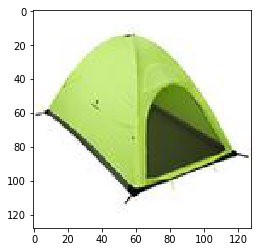

In [3]:
def testImageResize(image_file):
    img=Image.open(image_file)

    np_array = np.asarray(img)
    np_array = np.reshape(np_array, (128, 128, 3))
    im_in = Image.fromarray(np_array, "RGB")
    #im_in.show()
    plt.imshow(im_in)
    
test_image = './gear_image_clean/tents/resized10093342x1013403_zm.jpeg'
testImageResize(test_image)

In [4]:
images_container.keys()

NameError: name 'images_container' is not defined

### Equalize Image

In [18]:
def equalizeImage(test_image):
    im_in = Image.fromarray(test_image, "RGB")
    im_in_equal = ImageOps.equalize(im_in)
    return im_in_equal

# Test image equalize:
#test_image = images_container['tents'][3]
#equal_image = equalizeImage(test_image)
#plt.imshow(equal_image)
    

### Equalise all images

In [12]:
def EqualiseSourceImages():
    for category in images_container: # Tents
        
        for index, item in enumerate(images_container[category][0]): # Each source image in Tents
            im_in = Image.fromarray(item, "RGB")
            im_out = ImageOps.equalize(im_in)
            images_container[category][1][index] = np.asarray(im_out) # each modified image array
EqualiseSourceImages()

### Plot Image Histogram

In [13]:
def plotHistogram(np_array, title):
    np_array = np.asarray(np_array)
    plt.hist(np_array.flatten(), 256, range=(100.0, 250.0))
    plt.xlabel("Intensity")
    plt.ylabel("Frequency")
    #plt.title("Histogram Plot of Image")
    plt.title(title)

#test_image = './gear_image_clean/tents/resized10093342x1013403_zm.jpeg'
#plotHistogram(test_image)

### Plot before and after equalised image with histogram from numpy arrays

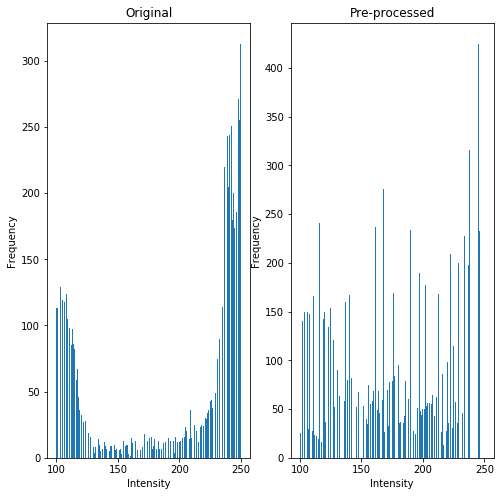

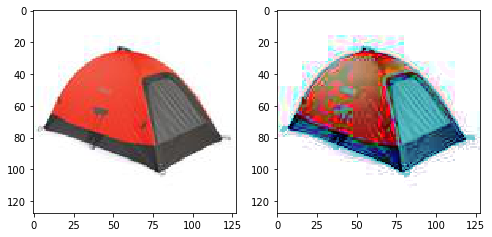

In [14]:
title_list = ['Original', 'Pre-processed']

im_orig = Image.fromarray(images_container['tents'][0][10], "RGB")
# plotHistogram(images_container['crampons'][0][5])

im_in2 = Image.fromarray(images_container['tents'][1][10], "RGB")
#im_in_equal2 = ImageOps.equalize(im_in2)
# plotHistogram(images_container['crampons'][1][5])

def plot_helper(rows, columns, np_arrays, is_hist=False, title_li=title_list):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, columns*rows + 1):
        fig.add_subplot(rows, columns, i)
        if is_hist:
            plotHistogram(np_arrays[i-1], title_li[i-1])
        else:
            plt.imshow(np_arrays[i-1])
    plt.show()
    
plot_helper(1, 2, [im_orig, im_in2], True)   
plot_helper(1, 2, [im_orig, im_in2]) 
        

### Show details of our final dataset

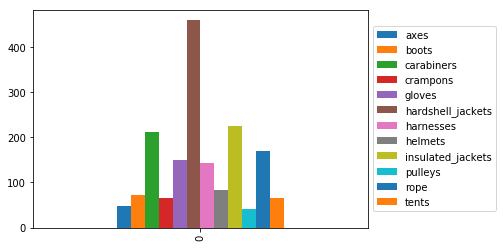

In [15]:
dataStats = {} 

def ShowDataStats():
    for category in images_container: # Tents
        dataStats[category] = len(images_container[category][0])
        #print(category + ' ' + str(len(images_container[category][0])))

ShowDataStats()

pd.pandas.DataFrame(dataStats, index=[0]).plot(kind='bar').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

### Create a super X (Feature Space) and y (outcome)

In [5]:
def mapCategoriesAsNumeric(y):
    category_class_map = {'tents':1, 'rope':2, 'harnesses':3, 'pulleys':4, 'crampons':5, 'axes':6, 
                      'insulated_jackets':7, 'carabiners':8, 'helmets':9, 'hardshell_jackets':10, 'boots':11, 'gloves':12}
    y_new = []
    for y_item in y:
        y_new.append(category_class_map[y_item])
    return y_new

def createFeatureX():
    categories = images_container.keys()
    y_list = []
    v_arr = None
    counter = 0
    v_list = []
    for category in categories:
        for product in images_container[category][1]:
            y_list.append(category)
            if counter == 0:                
                v_arr = np.copy(product)            
            if counter > 0:
                v_arr = np.vstack((v_arr, product))
            #print("v_arr.shape: {}".format(v_arr.shape))
            counter += 1
        v_list.append(v_arr)
        counter = 0
    y_list_numeric = mapCategoriesAsNumeric(y_list)
    y = np.asarray(y_list_numeric)
    h_arr = None
    counter1 = 0
    for i in range(len(v_list)):
        if counter1 == 0:
            h_arr = np.copy(v_list[0])        
        if counter1 > 0:
    #         print("h_arr.shape:{0} for i: {1}".format(h_arr.shape, i))
    #         print("v_list[i].shape:{0} for i: {1}".format(v_list[i].shape, i))
            h_arr = np.concatenate((h_arr, v_list[i]))
        counter1 += 1
    # Reshape the dimension of X based on the 1st dimension of y
    first_dim_x = y.shape[0]
    second_dim_x = int((h_arr.shape[0]*h_arr.shape[1]*h_arr.shape[2])/first_dim_x)
    X = np.reshape(h_arr, (first_dim_x, second_dim_x))
    return X, y

X,y = createFeatureX()
print("X.shape:{}".format(X.shape))
print("y.shape:{}".format(y.shape))

NameError: name 'images_container' is not defined

### Use sklearn.model_selection to split the data

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Now Train the Classifier with a number of classical models
 - Logistic Regression
 - KNN
 - SVM

In [18]:
from sklearn import neighbors, linear_model, svm

knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression()
svm_model = svm.SVC()
 

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))
print('SVM score: %f'
      % svm_model.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.903846
LogisticRegression score: 0.928846
SVM score: 0.278846


### Let us investigate why the SVM model is so poor (large variance!!)
 - We will get the score for the training data (i.e. in-sample data)
 - This analysis indicates gross overfitting!!!

In [19]:
#svm.get_params()
svm_model = svm.SVC(gamma=0.001)
print('SVM train score: %f'
      % svm_model.fit(X_train, y_train).score(X_train, y_train))

SVM train score: 1.000000


### Compute the Confusion Matrix of our classifier performance

In [20]:
from sklearn.metrics import confusion_matrix
y_hat_knn = knn.predict(X_test)
y_hat_logistic = logistic.predict(X_test)
knn_confusion = confusion_matrix(y_test, y_hat_knn)
logistic_confusion = confusion_matrix(y_test, y_hat_logistic)
print("knn_confusion: \n\n{}\n".format(knn_confusion))
print("logistic_confusion: \n\n{}\n".format(logistic_confusion))

knn_confusion: 

[[ 26   0   0   0   0   0   0   0   0   0   0   0]
 [  3  48   0   0   0   0   0   0   0   1   0   0]
 [  0   0  34   1   0   0   0   0   0   0   0   0]
 [  1   0   0   8   0   0   0   3   0   0   0   0]
 [  1   0   0   0  16   0   0   1   0   0   0   0]
 [  0   1   0   0   1  14   0   0   0   0   0   1]
 [  0   0   0   0   0   0  42   0   0  16   0   0]
 [  0   0   0   0   0   0   0  67   0   0   0   0]
 [  0   0   0   0   0   0   0   0  24   0   0   0]
 [  0   0   0   0   0   0   8   0   0 135   0   0]
 [  0   1   0   0   0   0   0   0   0   0  22   0]
 [  0   3   0   0   0   0   1   0   0   7   0  34]]

logistic_confusion: 

[[ 26   0   0   0   0   0   0   0   0   0   0   0]
 [  0  51   0   0   0   0   0   0   0   0   0   1]
 [  0   0  34   0   0   0   0   0   0   0   0   1]
 [  0   0   0  12   0   0   0   0   0   0   0   0]
 [  0   0   0   0  17   0   0   1   0   0   0   0]
 [  0   0   0   0   1  14   0   0   0   1   0   1]
 [  0   0   0   0   0   0  47   0   0  11

### Predict the class of the following piece of gear with the model

test_helmet_image.shape:(1, 49152)
y_hat_knn_test_helmet: [9]
y_hat_logistic_test_helmet: [9]


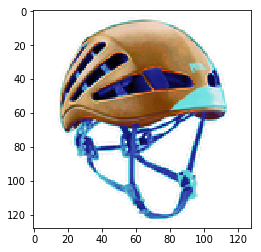

In [26]:
def preditHelmet(image_file):
    img=Image.open(image_file)
    old_size = img.size  # old_size[0] is in (width, height) format
    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    im = img.resize(new_size, Image.ANTIALIAS)
    new_im = Image.new("RGB", (desired_size, desired_size), color=(255,255,255,0))
    new_im.paste(im, ((desired_size-new_size[0])//2,
                                    (desired_size-new_size[1])//2))
    np_array = np.asarray(new_im)    
    np_array = np.reshape(np_array, (128, 128, 3))
    im_in_eq = equalizeImage(np_array)
    test_helmet_image = np.asarray(im_in_eq)
    test_helmet_image = np.reshape(test_helmet_image, (1, 128*128*3))
    #im_in = Image.fromarray(im_in_eq, "RGB")
    #im_in.show()
    plt.imshow(im_in_eq)
    print("test_helmet_image.shape:{}".format(test_helmet_image.shape))
    y_hat_knn_test_helmet = knn.predict(test_helmet_image)
    y_hat_logistic_test_helmet = logistic.predict(test_helmet_image)
    print("y_hat_knn_test_helmet: {}".format(y_hat_knn_test_helmet))
    print("y_hat_logistic_test_helmet: {}".format(y_hat_logistic_test_helmet))
    return test_helmet_image
#     y_hat_knn_test_helmet_im = Image.fromarray(y_hat_knn_test_helmet, "RGB")
#     y_hat_logistic_test_helmet_im = Image.fromarray(y_hat_logistic_test_helmet, "RGB")
  
   
test_image = './Challengetest/Test+Image.jpeg'
sampleImage = preditHelmet(test_image)

### To a grid search to optimize the classifier hyper-parameters

In [28]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import neighbors
import time

def runSearchGridForKnnModel():
    # construct the set of hyperparameters to tune
    params = {"n_neighbors": np.arange(1, 31, 2), "metric": ["euclidean", "cityblock"]}
    # tune the hyperparameters via a cross-validated grid search
    print("[INFO] tuning hyperparameters via grid search")

    knn = neighbors.KNeighborsClassifier(n_jobs=-1)
    grid = GridSearchCV(knn, params)
    start = time.time()
    grid.fit(X_train, y_train)
    
    print("Grid scores:")
    print()
    for params, mean_score, scores in grid.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print()

    # evaluate the best grid searched model on the testing data
    print("[INFO] grid search took {:.2f} seconds".format(
        time.time() - start))
    acc = grid.score(X_test, y_test)
    print("[INFO] grid search accuracy: {:.2f}%".format(acc * 100))
    print("[INFO] grid search best parameters: {}".format(
    grid.best_params_))
    
runSearchGridForKnnModel()

[INFO] tuning hyperparameters via grid search
Grid scores:

0.920 (+/-0.011) for {'metric': 'euclidean', 'n_neighbors': 1}
0.891 (+/-0.028) for {'metric': 'euclidean', 'n_neighbors': 3}
0.866 (+/-0.034) for {'metric': 'euclidean', 'n_neighbors': 5}
0.850 (+/-0.028) for {'metric': 'euclidean', 'n_neighbors': 7}
0.848 (+/-0.028) for {'metric': 'euclidean', 'n_neighbors': 9}
0.837 (+/-0.034) for {'metric': 'euclidean', 'n_neighbors': 11}
0.814 (+/-0.042) for {'metric': 'euclidean', 'n_neighbors': 13}
0.813 (+/-0.032) for {'metric': 'euclidean', 'n_neighbors': 15}
0.797 (+/-0.026) for {'metric': 'euclidean', 'n_neighbors': 17}
0.793 (+/-0.034) for {'metric': 'euclidean', 'n_neighbors': 19}
0.789 (+/-0.052) for {'metric': 'euclidean', 'n_neighbors': 21}
0.774 (+/-0.046) for {'metric': 'euclidean', 'n_neighbors': 23}
0.771 (+/-0.042) for {'metric': 'euclidean', 'n_neighbors': 25}
0.767 (+/-0.040) for {'metric': 'euclidean', 'n_neighbors': 27}
0.759 (+/-0.038) for {'metric': 'euclidean', 'n_n

### Pickle (Serialize) the Logistic Regression model

In [30]:
import pickle
from sklearn import datasets

def serializeModel(model, filename):
    file = open(filename, 'wb')
    pickle.dump(model, file)
    
    
def deserializeModel(saved_model_file):
    file = open(saved_model_file, 'rb')
    model = pickle.load(file)
    return model

def testPickleModel():
    # Pickle the model and save to disk
    model_filename = 'OpenHackModel.pl'
    serializeModel(logistic, model_filename)
    
    # unPickle the model
    model = deserializeModel(model_filename)
    acc = model.score(X_test, y_test)
    print("Accuracy of the pickled model on test data is: {}".format(acc))
    
testPickleModel()

Accuracy of the pickled model on test data is: 0.9288461538461539


### Deploy the the best model as a Web Service
 - Create the Web Service by specifying the workspace_id and authorization_token
 - Define the service (specify the service function)

In [20]:
import azureml
from azureml import services
workspace_id = '27eac0871d3f45fe8702d73863cc5607'
authorization_token = '309378c2039e435ebbdce34e6fbdb956'
ws = azureml.Workspace(workspace_id, authorization_token)

@services.publish(workspace_id, authorization_token)
@services.types(image = np.ndarray)
@services.returns(int)
def classifyImageSvr(image):
    model_filename = 'OpenHackModel.pl'
    # unPickle the model
    model = deserializeModel(model_filename)
    result = model.predict(image)
    return result[0]

AttributeError: 'Arguments' object has no attribute 'keywords'


### Pre-process Image for a new Prediction:
- Read the image
- Resize image
- Equalize the image
- Convert image into numpy array
- Reshape the array from (128, 128, 3) to (1, 128*128*3)

In [16]:
def preProcessImage(image_file):
    desired_size = 128
    img=Image.open(image_file)
    old_size = img.size  # old_size[0] is in (width, height) format
    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    im = img.resize(new_size, Image.ANTIALIAS)
    new_im = Image.new("RGB", (desired_size, desired_size), color=(255,255,255,0))
    new_im.paste(im, ((desired_size-new_size[0])//2,
                                    (desired_size-new_size[1])//2))
    np_array = np.asarray(new_im)    
    np_array = np.reshape(np_array, (128, 128, 3))
    im_in_eq = equalizeImage(np_array)
    test_image = np.asarray(im_in_eq)
    test_image = np.reshape(test_image, (1, 128*128*3))
    return test_image

### Get Image we want to predict

In [19]:
test_image_filename = './Challengetest/Test+Image.jpeg'
test_image = preProcessImage(test_image_filename)

### Create helper function to invoke the service on the client side

In [ ]:
import urllib2
import json

data = {"Inputs": {"input1": { "ColumnNames": [ "image" ],
                               "Values": [[test_image]] } }, # specified feature values
        "GlobalParameters": {} }

def runWebService(data, service_url, api_key):
    body = json.dumps(data)
    headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}
    req = urllib2.Request(service_url, body, headers) 
    try:
        response = urllib2.urlopen(req)
        result = json.loads(response.read())  # load json-formatted string response as dictionary
        print(result['Results']['output1']['value']['Values'][0][0]) # get the returned prediction
    except urllib2.HTTPError, error:
        print("The request failed with status code: " + str(error.code))
        print(error.info())
        print(json.loads(error.read())) 


In [17]:
y_test.shape

(520,)

In [322]:
221696/128

1732.0

In [323]:
categories

dict_keys(['tents', 'rope', 'harnesses', 'pulleys', 'crampons', 'axes', 'insulated_jackets', 'carabiners', 'helmets', 'hardshell_jackets', 'boots', 'gloves'])

### https://blogs.technet.microsoft.com/machinelearning/2017/09/25/deploying-machine-learning-models-using-azure-machine-learning/

### Create web schema

In [43]:
from azureml.api.schema.dataTypes import DataTypes
from azureml.api.schema.sampleDefinition import SampleDefinition
from azureml.api.realtime.services import generate_schema

def run(inputNumpyArray):
    global clf2, inputs_dc, prediction_dc
    try:
        #prediction = model.predict(input_df)
        #inputs_dc.collect(input_df)
        #prediction_dc.collect(prediction)
        return logistic.predict(inputNumpyArray)
    except Exception as e:
        return (str(e))

inputs = {"inputNumpyArray": SampleDefinition(DataTypes.NUMPY, sampleImage)}
generate_schema(run_func=run, inputs=inputs, filepath='./service_schema.json')

{'input': {'inputNumpyArray': {'internal': 'gANjYXp1cmVtbC5hcGkuc2NoZW1hLm51bXB5VXRpbApOdW1weVNjaGVtYQpxACmBcQF9cQIoWAUAAABzaGFwZXEDSwFNAMCGcQRYCQAAAGRhdGFfdHlwZXEFY251bXB5CmR0eXBlCnEGWAIAAAB1MXEHSwBLAYdxCFJxCShLA1gBAAAAfHEKTk5OSv////9K/////0sAdHELYnViLg==',
   'swagger': {'example': [[255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
    

### Set Up the Environment for Web Service Deployment

Guides:
https://blogs.technet.microsoft.com/machinelearning/2017/09/25/deploying-machine-learning-models-using-azure-machine-learning/
https://github.com/CatalystCode/CVWorkshop/blob/master/%235%20Bonus%20Model%20Deployment%20using%20Azure%20Machine%20Learning%20Model%20Management%20Service.ipynb


In [61]:
! az login
! az provider register -n Microsoft.MachineLearningCompute
! az provider register -n Microsoft.ContainerRegistry
! az provider register -n Microsoft.ContainerService

To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code CZTTV7QYC to authenticate.
Unexpected polling state code_expired
Registering is still on-going. You can monitor using 'az provider show -n Microsoft.MachineLearningCompute'
Registering is still on-going. You can monitor using 'az provider show -n Microsoft.ContainerRegistry'
Registering is still on-going. You can monitor using 'az provider show -n Microsoft.ContainerService'


In [68]:
! az provider show -n Microsoft.ContainerService

{
  "additionalProperties": {
    "authorization": {
      "applicationId": "7319c514-987d-4e9b-ac3d-d38c4f427f4c",
      "managedByRoleDefinitionId": "8e3af657-a8ff-443c-a75c-2fe8c4bcb635",
      "roleDefinitionId": "1b4a0c7f-2217-416f-acfa-cf73452fdc1c"
    }
  },
  "id": "/subscriptions/ff644cd8-2c0c-4d43-a4b6-4fbfa30be8b6/providers/Microsoft.ContainerService",
  "namespace": "Microsoft.ContainerService",
  "registrationState": "Registered",
  "resourceTypes": [
    {
      "additionalProperties": {
        "capabilities": "None"
      },
      "aliases": null,
      "apiVersions": [
        "2017-07-01",
        "2017-01-31",
        "2016-09-30",
        "2016-03-30"
      ],
      "locations": [
        "Japan East",
        "Central US",
        "East US 2",
        "Japan West",
        "East Asia",
        "South Central US",
        "Australia East",
        "Australia Southeast",
        "Brazil South",
        "Southeast Asia",
        "West US",
        "North Central US",

In [70]:
! az group create --name rgml --location 'West Europe'


{
  "id": "/subscriptions/ff644cd8-2c0c-4d43-a4b6-4fbfa30be8b6/resourceGroups/rgml",
  "location": "westeurope",
  "managedBy": null,
  "name": "rgml",
  "properties": {
    "provisioningState": "Succeeded"
  },
  "tags": null
}


In [87]:
! sudo /anaconda/envs/py35/bin/pip install -r https://aka.ms/az-ml-o16n-cli-requirements-file

The directory '/home/hacker/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/hacker/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.


You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [90]:
! az -h



Group
    az

Subgroups:
    account          : Manage Azure subscription information.
    acr              : Manage Azure Container Registries.
    acs              : Manage Azure Container Services.
    ad               : Synchronize on-premises directories and manage Azure Active Directory
                       resources.
    advisor          : (PREVIEW) Manage Azure Advisor.
    aks              : Manage Azure Kubernetes Services.
    appservice       : Manage App Service plans.
    backup           : Commands to manage Azure Backups.
    batch            : Manage Azure Batch.
    batchai          : Batch AI.
    billing          : Manage Azure Billing.
    cdn              : Manage Azure Content Delivery Networks (CDNs).
    cloud            : Manage registered Azure clouds.
    cognitiveservices: Manage Azure Cognitive Services accounts.
    consumption      : Manage consumption of Azure resources.
    container        : (PREVIEW) Manage Azure Container Instances.
    cosmosdb 

In [10]:
x = np.ones((20,20))
#type(x)
#@services.types?

In [ ]:
@services.types